In [1]:
import pandas as pd 
import numpy as np 
from  tensorflow.keras.layers import  Dense,SimpleRNN,Dropout
from  tensorflow.keras.models import  Sequential

In [2]:
df=pd.read_csv("GOOG.csv",index_col="date",parse_dates=True)

In [3]:
df.drop("symbol",axis=1,inplace=True)
df.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [4]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scaled_data = scalar.fit_transform(df)

train = scaled_data[df.index < "2020-01-01"]
test = scaled_data[df.index >= "2020-01-01"]

In [5]:
df[df.index<"2020-01-01"].shape

(894, 12)

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

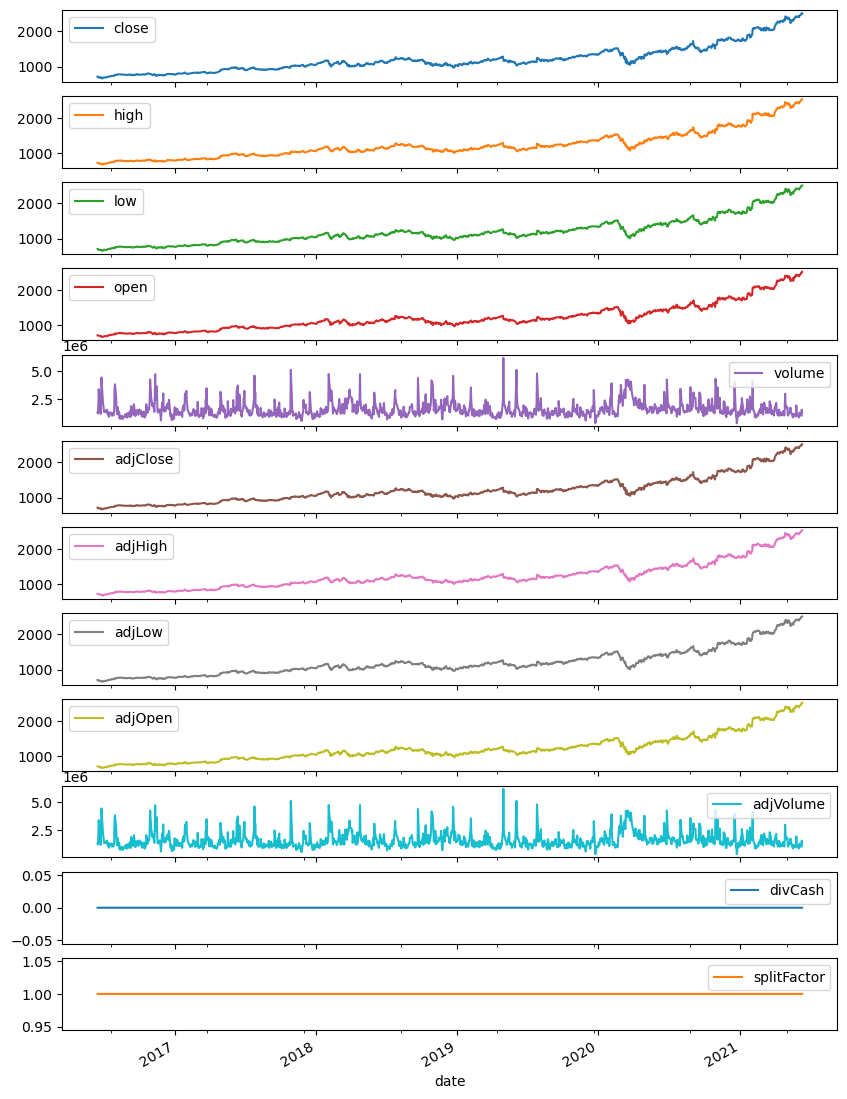

In [6]:
df.plot(subplots=True,figsize=(10,15))

In [7]:
train[:3]

array([[0.02698372, 0.02705034, 0.02715849, 0.0245318 , 0.16369747,
        0.02698372, 0.02705034, 0.02715849, 0.0245318 , 0.16369747,
        0.        , 0.        ],
       [0.02733443, 0.02732532, 0.02944187, 0.02589108, 0.14807567,
        0.02733443, 0.02732532, 0.02944187, 0.02589108, 0.14807567,
        0.        , 0.        ],
       [0.02271575, 0.02391235, 0.02178521, 0.02368495, 0.27911971,
        0.02271575, 0.02391235, 0.02178521, 0.02368495, 0.27911971,
        0.        , 0.        ]])

In [8]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [9]:
n_input = 30
n_features = 12
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=1)

#### y of generator[0]= train[30]cause first 30 inputs were taken
#### y of generator[1]= train[31] 
#### y of generator[2]= train[32]
#### and so on

In [10]:
x,y=generator[0]

https://www.youtube.com/watch?v=S8tpSG6Q2H0
goto 7:10 to understand this 

In [11]:
y

array([[0.03966353, 0.03890677, 0.04017208, 0.03629067, 0.19892653,
        0.03966353, 0.03890677, 0.04017208, 0.03629067, 0.19892653,
        0.        , 0.        ]])

In [12]:
train[30]

array([0.03966353, 0.03890677, 0.04017208, 0.03629067, 0.19892653,
       0.03966353, 0.03890677, 0.04017208, 0.03629067, 0.19892653,
       0.        , 0.        ])

In [13]:
x.shape
# 1 sample
# 30 timestamps 
# 12 features

(1, 30, 12)

# A. Build a Simple RNN  model  with 5 layers (use dropouts if required) to predict the stock price for the years 2020 and 2021..

In [15]:
rnn = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(30, 12)),
    Dropout(0.1),
    SimpleRNN(50, return_sequences=True),
    Dropout(0.1),
    SimpleRNN(50, return_sequences=True),
    SimpleRNN(50, return_sequences=True),
    SimpleRNN(50),
    Dense(12)  
])

C:\Users\godof\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
rnn.compile(optimizer='adam', loss='mse',metrics=["mae"])

In [17]:
history=rnn.fit(generator,epochs=10)

Epoch 1/10
 18/864 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.3413 - mae: 0.4522

C:\Users\godof\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


864/864 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 0.0383 - mae: 0.1150
Epoch 2/10
864/864 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.0039 - mae: 0.0412
Epoch 3/10
864/864 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.0036 - mae: 0.0364
Epoch 4/10
864/864 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.0036 - mae: 0.0379
Epoch 5/10
864/864 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.0036 - mae: 0.0377
Epoch 6/10
864/864 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0033 - mae: 0.0349
Epoch 7/10
864/864 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0032 - mae: 0.0326
Epoch 8/10
864/864 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 0.0042 - mae: 0.0373
Epoch 9/10
864/864 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.0028 - mae: 0.0285
Epoch 10/10
864/864 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.0038 - mae: 0.0380


# B. Comment on how many epochs (dropouts) is required for adequate learning.   

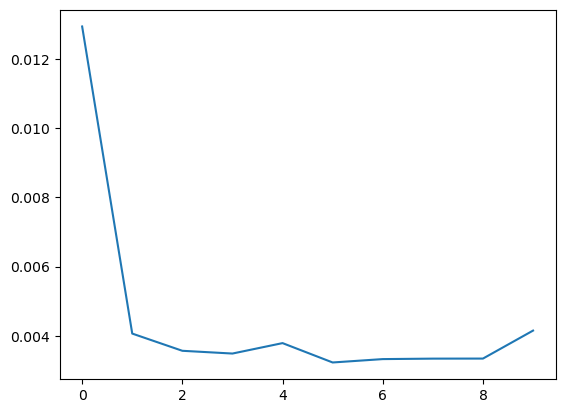

In [18]:
import matplotlib.pyplot as plt 
plt.plot(rnn.history.history["loss"])

In [19]:
rnn.predict(train[-30:].reshape([1,30,12]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step


array([[ 0.27069467,  0.27480316,  0.27480373,  0.26554874,  0.18932517,
         0.28964344,  0.28027374,  0.25326422,  0.26365137,  0.20259112,
         0.01441137, -0.00409977]], dtype=float32)

In [20]:
test[0]

array([0.37721627, 0.3751786 , 0.36962604, 0.36169306, 0.18087516,
       0.37721627, 0.3751786 , 0.36962604, 0.36169306, 0.18087516,
       0.        , 0.        ])

In [21]:
test_predictions = []

first_eval_batch = train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = rnn.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
     

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

In [22]:
test_predictions[50]

array([-0.00918015, -0.00272459,  0.00071753, -0.02138618,  0.19662866,
        0.02781324, -0.00473252, -0.04252771, -0.03391837,  0.23319553,
        0.01106066, -0.02052619], dtype=float32)

In [23]:
test[50]

array([0.22449739, 0.25878718, 0.22406248, 0.22924398, 0.66645553,
       0.22449739, 0.25878718, 0.22406248, 0.22924398, 0.66645553,
       0.        , 0.        ])

In [24]:
predicted_test=pd.DataFrame(scalar.inverse_transform(test_predictions),columns=df.columns,index=df[df.index >= "2020-01-01"].index)

# C. Compare the accuracy using MAPE and MSE

In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
print(mean_squared_error(test,test_predictions))
print(mean_absolute_percentage_error(test,test_predictions))

0.22932570303346597
11745548013673.736


# D. Plot the actual vs predicted values using the test data for the year 2020 and 2021 . 

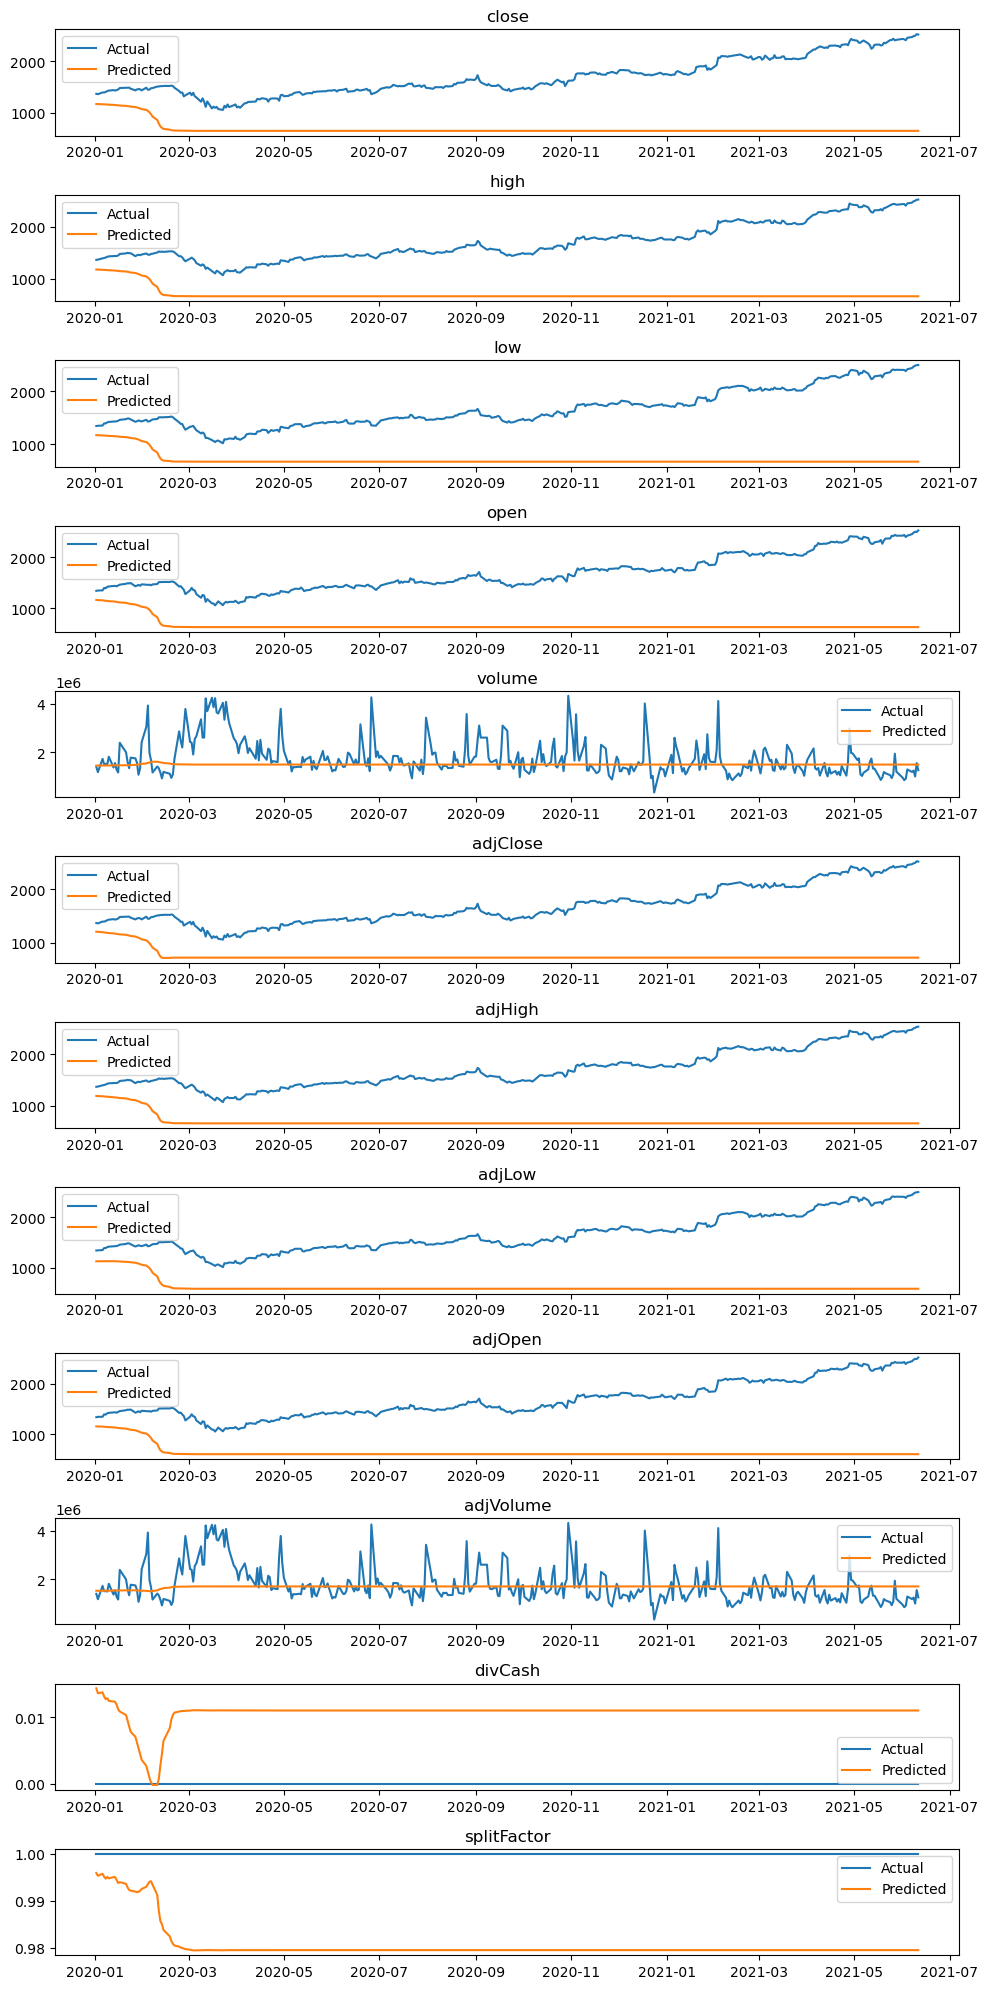

In [26]:
import matplotlib.pyplot as plt

# Plot the predicted_test and df DataFrames on the same graph
plt.figure(figsize=(10, 20))
for i, column in enumerate(predicted_test.columns):
    plt.subplot(len(predicted_test.columns), 1, i+1)
    plt.plot(df.index[df.index >= "2020-01-01"], df[column][df.index >= "2020-01-01"], label="Actual")
    plt.plot(df.index[df.index >= "2020-01-01"], predicted_test[column], label="Predicted")
    plt.title(column)
    plt.legend()

plt.tight_layout()
plt.show()
